In [7]:
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
import pylab as P
print "Loading data"

#alldata = pd.read_csv("ElectionsData.csv", header=0, index_col=0)
alldata = pd.read_csv("C:\\Users\\lavi\\Documents\\MyStuff\\MSC\\ML\\ml_ex-master\\train_raw.csv", header=0)

Loading data


In [8]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 39 columns):
Unnamed: 0                                       6000 non-null int64
Vote                                             6000 non-null object
Occupation_Satisfaction                          5891 non-null float64
Avg_monthly_expense_when_under_age_21            5885 non-null float64
AVG_lottary_expanses                             5900 non-null float64
Most_Important_Issue                             5946 non-null object
Avg_Satisfaction_with_previous_vote              5897 non-null float64
Looking_at_poles_results                         5944 non-null object
Garden_sqr_meter_per_person_in_residancy_area    5871 non-null float64
Married                                          5963 non-null object
Gender                                           5953 non-null object
Voting_Time                                      5941 non-null object
Financial_balance_score_(0-1)                    

In [10]:
#Looking into the distribution of the different feautures with respect to the vote.

for key in alldata.columns:
    print key, alldata[key].dtype
    if  (key != 'Vote'):
        if (alldata[key].dtype == np.object):
            analysis = pd.crosstab(alldata["Vote"],alldata[key],margins=True)
            print analysis
        else:
            analysis = alldata[key].groupby(alldata["Vote"]).mean()
            print analysis

    

#pd.crosstab(alldata["AVG_lottary_expanses"],alldata["Vote"],margins=True)


Unnamed: 0 int64
Vote
Blues      4917.036496
Browns     4992.579041
Greens     4901.457114
Greys      4994.707692
Oranges    5187.380368
Pinks      5025.795082
Purples    5081.500000
Reds       5008.184971
Whites     5218.825243
Yellows    5022.575000
Name: Unnamed: 0, dtype: float64
Vote object
Occupation_Satisfaction float64
Vote
Blues      5.596654
Browns     5.608219
Greens     5.498458
Greys      4.987578
Oranges    5.583851
Pinks      5.545000
Purples    5.487310
Reds       5.562130
Whites     5.612745
Yellows    5.328076
Name: Occupation_Satisfaction, dtype: float64
Avg_monthly_expense_when_under_age_21 float64
Vote
Blues      1502.967333
Browns      409.163356
Greens      390.974444
Greys       390.702006
Oranges     398.115160
Pinks       399.324048
Purples     401.789849
Reds        379.152649
Whites      408.354238
Yellows     514.533937
Name: Avg_monthly_expense_when_under_age_21, dtype: float64
AVG_lottary_expanses float64
Vote
Blues      191720.750402
Browns      52431.86

Financial_agenda_matters    No   Yes   All
Vote                                      
Blues                      259   285   544
Browns                     564   550  1114
Greens                     508   476   984
Greys                      166   156   322
Oranges                    156   165   321
Pinks                      307   297   604
Purples                    588   607  1195
Reds                       173   170   343
Whites                     111    94   205
Yellows                    153   166   319
All                       2985  2966  5951


Features with diribution correletated to the target class:
    Avg_monthly_expense_when_under_age_21
    AVG_lottary_expanses
    Most_Important_Issue
    Avg_Satisfaction_with_previous_vote
    Garden_sqr_meter_per_person_in_residancy_area
    Gender   
    Married    
    Voting_Time
    Avg_Residancy_Altitude
    Yearly_IncomeK
    Avg_monthly_household_cost
    Will_vote_only_large_party
    Phone_minutes_10_years
    Avg_size_per_room
    Weighted_education_rank
    %_satisfaction_financial_policy
    Avg_monthly_income_all_years
    Last_school_grades
    Age_group
    Political_interest_Total_Score
    Number_of_valued_Kneset_members
    Main_transportation
    Occupation
    Overall_happiness_score
    Num_of_kids_born_last_10_years
    Financial_agenda_matters
    Looking_at_poles_results
    
We got 27 features that seems to have some impact on the classification. Looking at all the data we got only 18. 

In [11]:
alldata['Will_vote_only_large_party_int'] = alldata['Will_vote_only_large_party'].dropna().map( {'Yes':1, 'No':-1, 'Maybe':0}).astype(int)
alldata = alldata.drop('Will_vote_only_large_party', 1)

alldata['Financial_agenda_matters_int'] = alldata['Financial_agenda_matters'].dropna().map( {'Yes':1, 'No':-1}).astype(int)
alldata = alldata.drop('Financial_agenda_matters', 1)

alldata['Looking_at_poles_results_int'] = alldata['Looking_at_poles_results'].dropna().map( {'Yes':1, 'No':-1}).astype(int)
alldata = alldata.drop('Looking_at_poles_results', 1)

alldata['Married_int'] = alldata['Married'].dropna().map( {'Yes':1, 'No':-1}).astype(int)
alldata = alldata.drop('Married', 1)

alldata['Gender_int'] = alldata['Gender'].dropna().map( {'Male':1, 'Female':-1}).astype(int)
alldata = alldata.drop('Gender', 1)

#map categorical values to numbers
for attr in (['Most_Important_Issue', 'Voting_Time', 'Age_group', 'Main_transportation', 'Occupation']):
    alldata[attr] = alldata[attr].astype("category")
    alldata[attr+'_int'] = alldata[attr].dropna().cat.rename_categories(range(alldata[attr].nunique())).astype(int)
    alldata = alldata.drop(attr, 1)

In [13]:
good_features = ['Avg_monthly_expense_when_under_age_21',
    'AVG_lottary_expanses',
    'Most_Important_Issue_int',
    'Avg_Satisfaction_with_previous_vote',
    'Garden_sqr_meter_per_person_in_residancy_area',
    'Gender_int',   
    'Married_int',    
    'Voting_Time_int',
    'Avg_Residancy_Altitude',
    'Yearly_IncomeK',
    'Avg_monthly_household_cost',
    'Will_vote_only_large_party_int',
    'Phone_minutes_10_years',
    'Avg_size_per_room',
    'Weighted_education_rank',
    '%_satisfaction_financial_policy',
    'Avg_monthly_income_all_years',
    'Last_school_grades',
    'Age_group_int',
    'Political_interest_Total_Score',
    'Number_of_valued_Kneset_members',
    'Main_transportation_int',
    'Occupation_int',
    'Overall_happiness_score',
    'Num_of_kids_born_last_10_years',
    'Financial_agenda_matters_int',
    'Looking_at_poles_results_int']

In [14]:
#corrdata = alldata[good_features]

corrdata = alldata[good_features].corr(method='pearson')
corrdata
    


,Avg_monthly_expense_when_under_age_21,AVG_lottary_expanses,Most_Important_Issue_int,Avg_Satisfaction_with_previous_vote,Garden_sqr_meter_per_person_in_residancy_area,Gender_int,Married_int,Voting_Time_int,Avg_Residancy_Altitude,Yearly_IncomeK,...,Last_school_grades,Age_group_int,Political_interest_Total_Score,Number_of_valued_Kneset_members,Main_transportation_int,Occupation_int,Overall_happiness_score,Num_of_kids_born_last_10_years,Financial_agenda_matters_int,Looking_at_poles_results_int
Avg_monthly_expense_when_under_age_21,1.000000,0.805949,-0.034456,1.000000,-0.049115,0.015488,-0.101007,-0.000285,-0.024538,-0.226001,...,0.076032,0.008100,-0.285359,0.169640,0.013244,0.012969,-0.239657,-0.002390,0.016132,0.595108
AVG_lottary_expanses,0.805949,1.000000,-0.022265,0.807344,0.413296,0.012186,-0.396513,-0.000506,-0.003236,-0.122218,...,0.046992,-0.007405,-0.158199,0.097210,0.024478,0.006587,-0.242547,0.006990,0.016400,0.475285
Most_Important_Issue_int,-0.034456,-0.022265,1.000000,-0.035440,0.002852,-0.013678,0.049484,-0.020529,-0.003101,-0.044065,...,-0.555438,-0.000388,-0.050201,-0.326355,-0.006615,0.013007,-0.046182,-0.007790,-0.003923,-0.063586
Avg_Satisfaction_with_previous_vote,1.000000,0.807344,-0.035440,1.000000,-0.050452,0.017296,-0.103020,-0.003353,-0.024847,-0.225794,...,0.073401,0.005706,-0.284522,0.169466,0.014001,0.011609,-0.240131,-0.001893,0.021897,0.596429
Garden_sqr_meter_per_person_in_residancy_area,-0.049115,0.413296,0.002852,-0.050452,1.000000,-0.004528,-0.745369,-0.007058,0.007338,0.244520,...,-0.060790,-0.017169,0.221489,-0.175852,0.001286,-0.003080,-0.146610,0.008136,0.013616,-0.019140
Gender_int,0.015488,0.012186,-0.013678,0.017296,-0.004528,1.000000,-0.000430,0.002551,-0.030214,-0.007054,...,0.024167,0.008266,-0.009139,0.042043,0.019010,0.010623,-0.004579,0.019977,0.009491,0.013630
Married_int,-0.101007,-0.396513,0.049484,-0.103020,-0.745369,-0.000430,1.000000,0.013803,0.002238,-0.252301,...,-0.088458,0.018320,-0.217738,0.094593,-0.007107,-0.010102,0.105394,-0.010815,-0.014107,-0.250703
Voting_Time_int,-0.000285,-0.000506,-0.020529,-0.003353,-0.007058,0.002551,0.013803,1.000000,0.013700,0.000599,...,0.004276,0.000048,-0.005300,0.005353,-0.012312,0.017512,-0.013996,-0.015243,-0.013466,-0.010263
Avg_Residancy_Altitude,-0.024538,-0.003236,-0.003101,-0.024847,0.007338,-0.030214,0.002238,0.013700,1.000000,-0.007802,...,0.009672,0.000412,-0.005995,-0.005935,0.005357,0.003044,-0.002557,0.011929,0.008322,-0.013375
Yearly_IncomeK,-0.226001,-0.122218,-0.044065,-0.225794,0.244520,-0.007054,-0.252301,0.000599,-0.007802,1.000000,...,0.068018,-0.002333,0.909312,0.009377,-0.023454,0.002704,0.304846,0.023638,-0.015790,-0.228667


Highly coorelated features:
Avg_monthly_expense_when_under_age_21	 - Avg_Satisfaction_with_previous_vote / Avg_monthly_income_all_years
Avg_Satisfaction_with_previous_vote - Avg_monthly_income_all_years
(closely related) Yearly_IncomeK - Political_interest_Total_Score / Avg_monthly_household_cost / Avg_size_per_room / Political_interest_Total_Score	
Garden_sqr_meter_per_person_in_residancy_area - Phone_minutes_10_years / Avg_monthly_expense_on_pets_or_plants

In [15]:
corrdata = alldata.corr(method='pearson')
corrdata

,Unnamed: 0,Occupation_Satisfaction,Avg_monthly_expense_when_under_age_21,AVG_lottary_expanses,Avg_Satisfaction_with_previous_vote,Garden_sqr_meter_per_person_in_residancy_area,Financial_balance_score_(0-1),%Of_Household_Income,Avg_government_satisfaction,Avg_education_importance,...,Will_vote_only_large_party_int,Financial_agenda_matters_int,Looking_at_poles_results_int,Married_int,Gender_int,Most_Important_Issue_int,Voting_Time_int,Age_group_int,Main_transportation_int,Occupation_int
Unnamed: 0,1.000000,0.002092,-0.007717,-0.004027,-0.009756,0.008378,-0.005558,-0.001871,0.007922,-0.019894,...,-0.003095,-0.003486,-0.008214,0.003367,0.028561,-0.004963,-0.010953,-0.025953,-0.004922,-0.030206
Occupation_Satisfaction,0.002092,1.000000,0.006108,0.008262,0.008016,0.012578,0.001155,-0.024046,-0.016694,0.001538,...,-0.010546,0.002937,-0.001776,-0.023619,0.018017,-0.015775,0.012200,-0.001872,0.041918,0.007869
Avg_monthly_expense_when_under_age_21,-0.007717,0.006108,1.000000,0.805949,1.000000,-0.049115,0.020476,-0.000086,-0.016416,-0.016173,...,0.513933,0.016132,0.595108,-0.101007,0.015488,-0.034456,-0.000285,0.008100,0.013244,0.012969
AVG_lottary_expanses,-0.004027,0.008262,0.805949,1.000000,0.807344,0.413296,0.011619,-0.000844,-0.013288,-0.012152,...,0.423862,0.016400,0.475285,-0.396513,0.012186,-0.022265,-0.000506,-0.007405,0.024478,0.006587
Avg_Satisfaction_with_previous_vote,-0.009756,0.008016,1.000000,0.807344,1.000000,-0.050452,0.019377,0.001796,-0.017480,-0.011835,...,0.516069,0.021897,0.596429,-0.103020,0.017296,-0.035440,-0.003353,0.005706,0.014001,0.011609
Garden_sqr_meter_per_person_in_residancy_area,0.008378,0.012578,-0.049115,0.413296,-0.050452,1.000000,0.003557,-0.007864,-0.009937,-0.006737,...,0.038893,0.013616,-0.019140,-0.745369,-0.004528,0.002852,-0.007058,-0.017169,0.001286,-0.003080
Financial_balance_score_(0-1),-0.005558,0.001155,0.020476,0.011619,0.019377,0.003557,1.000000,-0.014565,-0.000776,-0.001925,...,0.001858,-0.011945,0.006581,0.007876,0.003278,-0.018321,-0.014586,-0.014669,0.015696,-0.000226
%Of_Household_Income,-0.001871,-0.024046,-0.000086,-0.000844,0.001796,-0.007864,-0.014565,1.000000,-0.001053,-0.003011,...,-0.002965,0.014587,-0.004545,-0.001584,0.000304,0.000547,0.015835,-0.005967,0.007276,0.002433
Avg_government_satisfaction,0.007922,-0.016694,-0.016416,-0.013288,-0.017480,-0.009937,-0.000776,-0.001053,1.000000,-0.005050,...,-0.027180,0.017191,-0.027744,0.009839,0.018147,-0.022206,-0.006629,0.001206,-0.013871,-0.014273
Avg_education_importance,-0.019894,0.001538,-0.016173,-0.012152,-0.011835,-0.006737,-0.001925,-0.003011,-0.005050,1.000000,...,0.015502,-0.014667,0.004532,0.011891,-0.000942,0.002161,-0.000434,0.018840,0.010907,0.001981


Checking for distributions

C:\Users\lavi\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


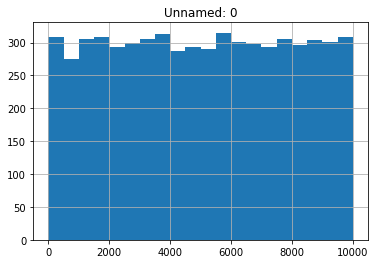

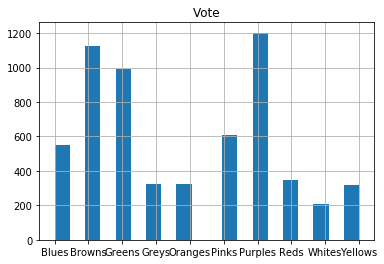

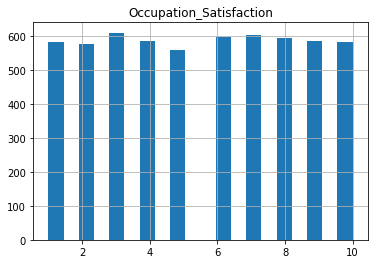

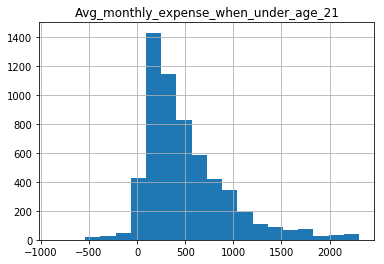

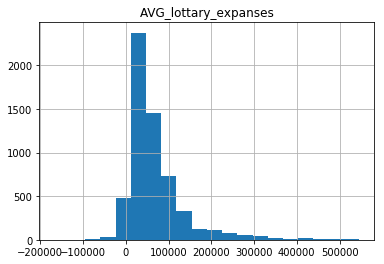

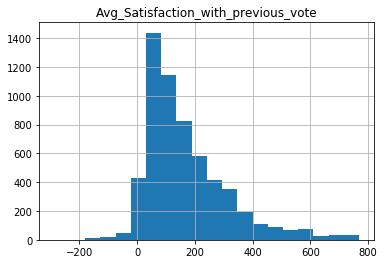

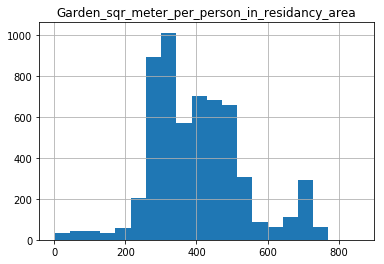

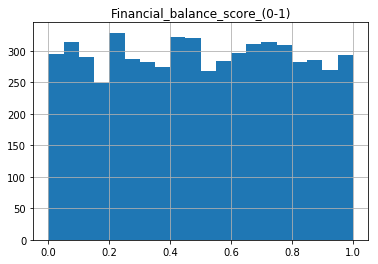

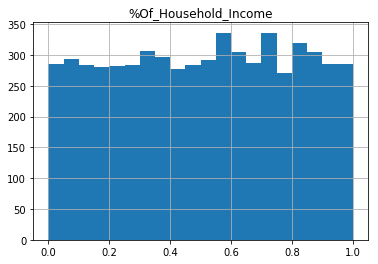

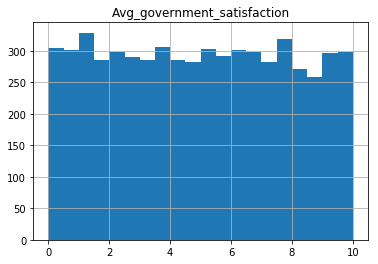

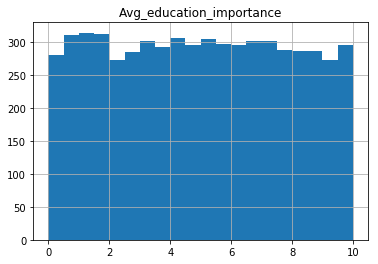

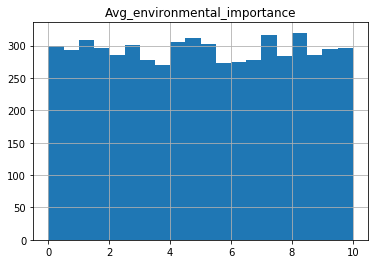

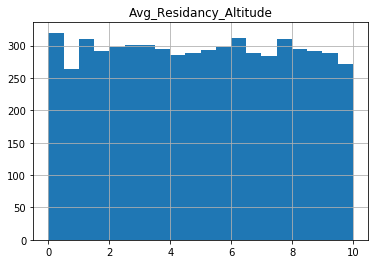

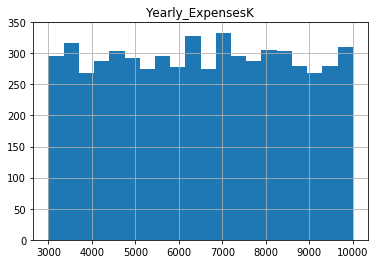

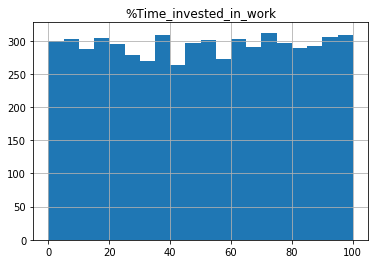

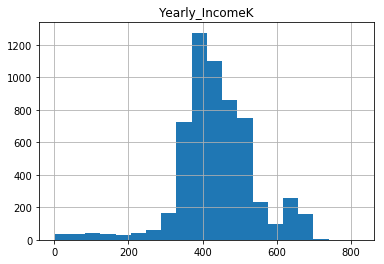

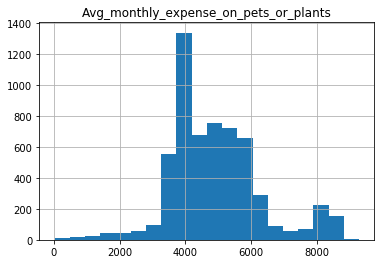

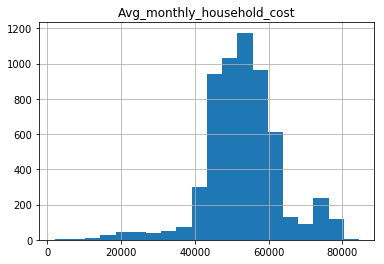

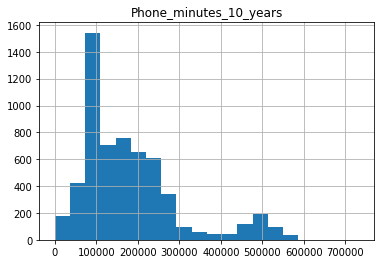

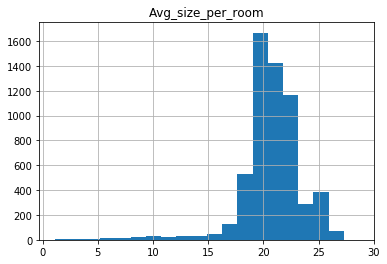

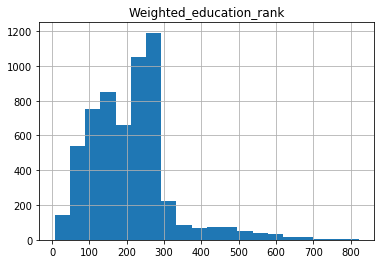

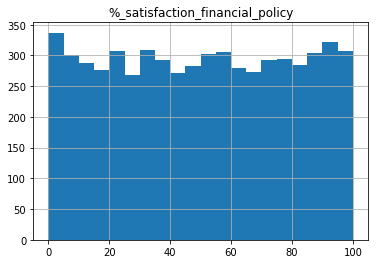

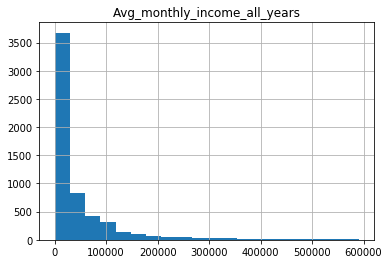

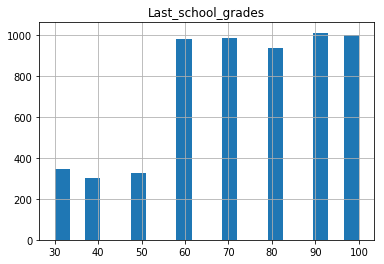

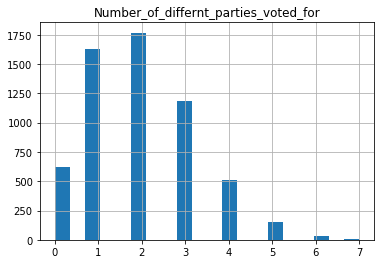

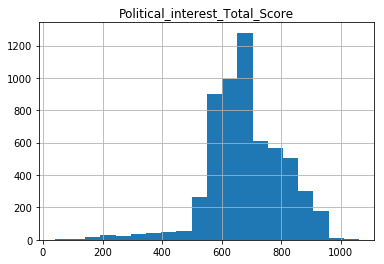

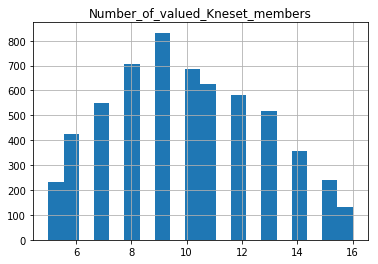

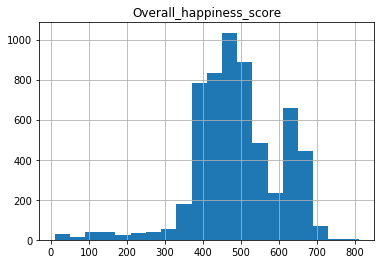

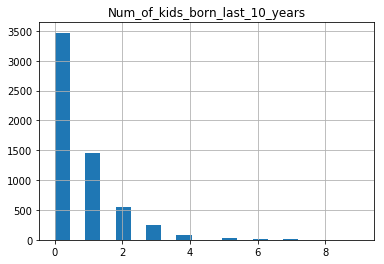

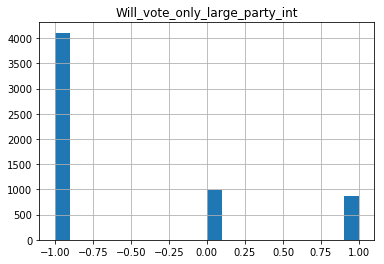

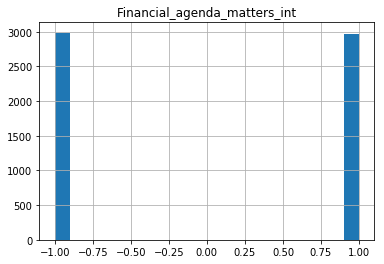

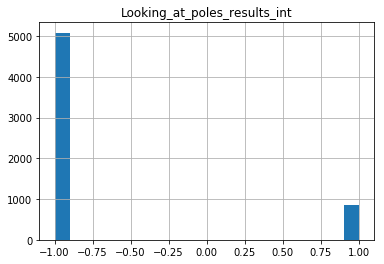

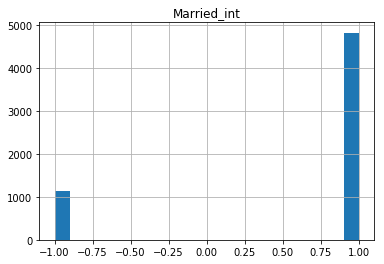

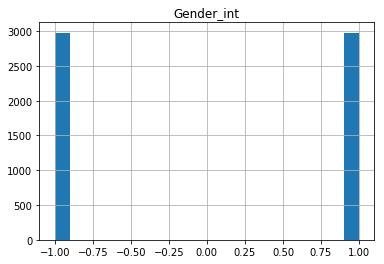

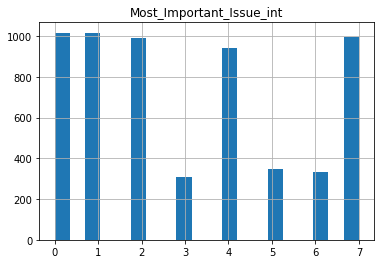

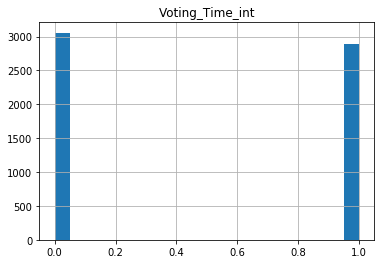

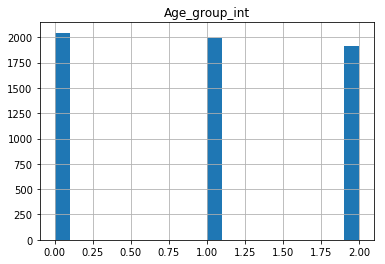

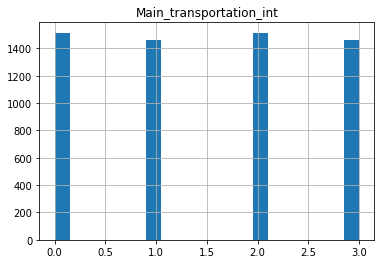

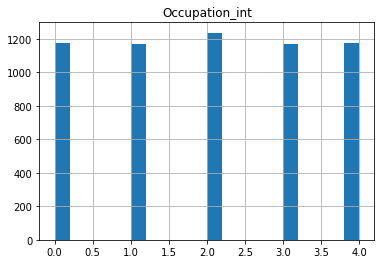

In [16]:
#alldata['Avg_monthly_expense_when_under_age_21'].hist()
#alldata['Garden_sqr_meter_per_person_in_residancy_area'].hist()
#P.show()
from matplotlib import pyplot as plt
for feature in alldata.columns:
    plt.figure()
    alldata[feature].hist(bins=20)
    plt.title(feature)

P.show()



Uniform: unnamed, occupation_satisfaction,%Of_household, avg_government_statisfaction, avg_education, avg_environmental, avg_residency, yearly_espenses, %time_invested, %satisfaction_financial_policy, Age_group, main_transport, occupation

Filling in the missing data based on the above infomration (class dependancy + features corrleation):

In [17]:
class_dependand_non_numerical = ['Will_vote_only_large_party_int',
                                 'Married_int',
                                 'Looking_at_poles_results_int',
                                 'Last_school_grades',
                                 'Gender_int',
                                 'Number_of_valued_Kneset_members',
                                 'Most_Important_Issue_int',
                                 'Age_group_int',
                                 'Main_transportation_int',
                                 'Occupation_int',
                                 'Num_of_kids_born_last_10_years',
                                 'Financial_agenda_matters_int',
                                 'Voting_Time_int']

non_class_dependand_non_numerical = [
                                     'Number_of_differnt_parties_voted_for'                                   
                                     ]

class_dependand_numerical = ['AVG_lottary_expanses',
                             'Avg_monthly_expense_when_under_age_21',
                             'Avg_Satisfaction_with_previous_vote',
                             'Garden_sqr_meter_per_person_in_residancy_area',
                             'Yearly_IncomeK',
                             #'Avg_monthly_expense_on_pets_or_plants',
                             'Avg_monthly_household_cost',
                             'Phone_minutes_10_years',
                             #'Avg_size_per_room',
                             'Weighted_education_rank',
                             'Avg_monthly_income_all_years',
                             'Political_interest_Total_Score',
                             'Overall_happiness_score',
                            '%_satisfaction_financial_policy']

non_class_dependand_numerical = ['Financial_balance_score_(0-1)',
                                 '%Of_Household_Income',
                                 'Avg_government_satisfaction',
                                 'Avg_education_importance',
                                 'Avg_environmental_importance',
                                 'Occupation_Satisfaction',
                                 'Yearly_ExpensesK',
                                 '%Time_invested_in_work',
                                 'Avg_Residancy_Altitude'
                                 ]


Now loading all the data: test + validation

In [43]:
alldata = pd.read_csv("C:\\Users\\lavi\\Documents\\MyStuff\\MSC\\ML\\ml_ex-master\\validation_raw.csv", header=0)
#alldata = pd.read_csv("C:\\Users\Lavi\\PycharmProjects\\ml_ex\\test_raw.csv", header=0)
#alldata = pd.read_csv("C:\\Users\Lavi\\PycharmProjects\\ml_ex\\train_raw.csv", header=0)

#Applying previous transformation

alldata['Will_vote_only_large_party_int'] = alldata['Will_vote_only_large_party'].dropna().map( {'Yes':1, 'No':-1, 'Maybe':0}).astype(int)
alldata = alldata.drop('Will_vote_only_large_party', 1)

alldata['Financial_agenda_matters_int'] = alldata['Financial_agenda_matters'].dropna().map( {'Yes':1, 'No':-1}).astype(int)
alldata = alldata.drop('Financial_agenda_matters', 1)

alldata['Looking_at_poles_results_int'] = alldata['Looking_at_poles_results'].dropna().map( {'Yes':1, 'No':-1}).astype(int)
alldata = alldata.drop('Looking_at_poles_results', 1)

alldata['Married_int'] = alldata['Married'].dropna().map( {'Yes':1, 'No':-1}).astype(int)
alldata = alldata.drop('Married', 1)

alldata['Gender_int'] = alldata['Gender'].dropna().map( {'Male':1, 'Female':-1}).astype(int)
alldata = alldata.drop('Gender', 1)

#map categorical values to numbers
for attr in (['Most_Important_Issue', 'Voting_Time', 'Age_group', 'Main_transportation', 'Occupation']):
    alldata[attr] = alldata[attr].astype("category")
    alldata[attr+'_int'] = alldata[attr].dropna().cat.rename_categories(range(alldata[attr].nunique())).astype(int)
    alldata = alldata.drop(attr, 1)

many of the numerical values have been transfered to class dependednt based on previous observation (crosstabe view above)

Now - removing outliers (based on standard diviation) :

In [44]:
for key in non_class_dependand_numerical:
    mean = alldata[key].mean()
    std = alldata[key].std()
    max_val = mean + 3 * std
    min_val = mean - 3 * std
    for index, row in alldata[alldata[key] > max_val].iterrows():
        alldata.at[index, key] = np.nan
    for index, row in alldata[alldata[key] < min_val].iterrows():
        alldata.at[index, key] = np.nan

for key in class_dependand_numerical:
    for vote in alldata['Vote'].unique():
        vote_data = alldata[(alldata.Vote == vote)][[key]]
        mean = vote_data[key].mean()
        std = vote_data[key].std()
        max_val = mean + 3 * std
        min_val = mean - 3 * std
        for index, row in vote_data[vote_data[key] > max_val].iterrows():
            vote_data.at[index, key] = np.nan
        for index, row in vote_data[vote_data[key] < min_val].iterrows():
            vote_data.at[index, key] = np.nan

In [45]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 39 columns):
Unnamed: 0                                       2000 non-null int64
Vote                                             2000 non-null object
Occupation_Satisfaction                          1957 non-null float64
Avg_monthly_expense_when_under_age_21            1957 non-null float64
AVG_lottary_expanses                             1958 non-null float64
Avg_Satisfaction_with_previous_vote              1957 non-null float64
Garden_sqr_meter_per_person_in_residancy_area    1959 non-null float64
Financial_balance_score_(0-1)                    1965 non-null float64
%Of_Household_Income                             1961 non-null float64
Avg_government_satisfaction                      1956 non-null float64
Avg_education_importance                         1960 non-null float64
Avg_environmental_importance                     1952 non-null float64
Avg_Residancy_Altitude                      

Filling gaps:

In [46]:

alldata['Yearly_IncomeK_Avg_size_per_room_ratio'] = alldata['Yearly_IncomeK'] / alldata['Avg_size_per_room']
ratio_to_fill = alldata['Yearly_IncomeK_Avg_size_per_room_ratio'].mean()
alldata['Yearly_IncomeK_filled'] = alldata['Yearly_IncomeK']
for index, row in alldata[alldata['Yearly_IncomeK_filled'].isnull()].iterrows():
    alldata.at[index, 'Yearly_IncomeK_filled'] = row['Avg_size_per_room'] * ratio_to_fill

alldata['Yearly_IncomeK'] = alldata['Yearly_IncomeK_filled']
alldata = alldata.drop(['Yearly_IncomeK_Avg_size_per_room_ratio', 'Avg_size_per_room', 'Yearly_IncomeK_filled'], 1)

alldata['Garden_sqr_meter_per_person_in_residancy_area_Avg_monthly_expense_on_pets_or_plants_ratio'] = alldata['Garden_sqr_meter_per_person_in_residancy_area'] / alldata['Avg_monthly_expense_on_pets_or_plants']
ratio_to_fill = alldata['Garden_sqr_meter_per_person_in_residancy_area_Avg_monthly_expense_on_pets_or_plants_ratio'].mean()
alldata['Garden_sqr_meter_per_person_in_residancy_area_filled'] = alldata['Garden_sqr_meter_per_person_in_residancy_area']
for index, row in alldata[alldata['Garden_sqr_meter_per_person_in_residancy_area_filled'].isnull()].iterrows():
    alldata.at[index, 'Garden_sqr_meter_per_person_in_residancy_area_filled'] = row['Avg_monthly_expense_on_pets_or_plants'] * ratio_to_fill

alldata['Garden_sqr_meter_per_person_in_residancy_area'] = alldata['Garden_sqr_meter_per_person_in_residancy_area_filled']
alldata = alldata.drop(['Garden_sqr_meter_per_person_in_residancy_area_Avg_monthly_expense_on_pets_or_plants_ratio','Avg_monthly_expense_on_pets_or_plants','Garden_sqr_meter_per_person_in_residancy_area_filled'], 1)

In [47]:
#Fill gaps in non class dependand numerical attributes with the global median
for key in non_class_dependand_numerical:
    median = alldata[key].median()
    for index, row in alldata[alldata[key].isnull()].iterrows():
        alldata.at[index, key] = median

#Fill gaps in  class dependand numerical attributes   using the median in the class Class (=Vote)
for key in class_dependand_numerical:
    for index, row in alldata[alldata[key].isnull()].iterrows():
        median = alldata[(alldata.Vote == row['Vote'])][key].median()
        alldata.at[index, key] = median

#Fill gaps in non class dependand non-numerical attributes with the global mode
for key in non_class_dependand_non_numerical:
    mode = alldata[key].dropna().mode()[0]
    for index, row in alldata[alldata[key].isnull()].iterrows():
        alldata.at[index, key] = mode

#Fill gaps class dependant non numerical data using the mode in the class Class (=Vote)
for key in class_dependand_non_numerical:
    for index, row in alldata[alldata[key].isnull()].iterrows():
        mode = alldata[(alldata.Vote == row['Vote'])][key].dropna().mode()[0]
        alldata.at[index, key] = mode

In [48]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 37 columns):
Unnamed: 0                                       2000 non-null int64
Vote                                             2000 non-null object
Occupation_Satisfaction                          2000 non-null float64
Avg_monthly_expense_when_under_age_21            2000 non-null float64
AVG_lottary_expanses                             2000 non-null float64
Avg_Satisfaction_with_previous_vote              2000 non-null float64
Garden_sqr_meter_per_person_in_residancy_area    2000 non-null float64
Financial_balance_score_(0-1)                    2000 non-null float64
%Of_Household_Income                             2000 non-null float64
Avg_government_satisfaction                      2000 non-null float64
Avg_education_importance                         2000 non-null float64
Avg_environmental_importance                     2000 non-null float64
Avg_Residancy_Altitude                      

Scalling data based on the above inforamtion (disribution)

In [49]:
#This is just percent in 0..100, so we can just divide by 100 (Decimal Scaling)
alldata['%Time_invested_in_work'] = alldata['%Time_invested_in_work'].map(lambda x: x/100)
alldata['%_satisfaction_financial_policy'] = alldata['%_satisfaction_financial_policy'].map(lambda x: x/100)
alldata['Last_school_grades'] = alldata['Last_school_grades'].map(lambda x: x/100)

In [50]:
#These attributes are 1> >10, and more or less uniform, so just scale them back by a factor of 10 (Decimal Scaling)
#yearly_espenses, %time_invested, %satisfaction_financial_policy, Age_group, main_transport, occupation
alldata['Occupation_Satisfaction'] = alldata['Occupation_Satisfaction'].map(lambda x: x/10)
alldata['Avg_government_satisfaction'] = alldata['Avg_government_satisfaction'].map(lambda x: x/10)
alldata['Avg_education_importance'] = alldata['Avg_education_importance'].map(lambda x: x/10)
alldata['Avg_environmental_importance'] = alldata['Avg_environmental_importance'].map(lambda x: x/10)
alldata['Avg_Residancy_Altitude'] = alldata['Avg_Residancy_Altitude'].map(lambda x: x/10)
alldata['Yearly_ExpensesK'] = alldata['Yearly_ExpensesK'].map(lambda x: x/10)
alldata['%Time_invested_in_work'] = alldata['%Time_invested_in_work'].map(lambda x: x/10)
alldata['%_satisfaction_financial_policy'] = alldata['%_satisfaction_financial_policy'].map(lambda x: x/10)
alldata['Age_group_int'] = alldata['Age_group_int'].map(lambda x: x/10)
alldata['Occupation_int'] = alldata['Occupation_int'].map(lambda x: x/10)
alldata['Main_transportation_int'] = alldata['Main_transportation_int'].map(lambda x: x/10)

In [51]:
#All the rest of the features, map using z-score
zscore = ['Garden_sqr_meter_per_person_in_residancy_area',
          'Number_of_valued_Kneset_members',
          'AVG_lottary_expanses',
          'Avg_Satisfaction_with_previous_vote',
          'Yearly_IncomeK',
          'Avg_monthly_expense_when_under_age_21',
          'Avg_monthly_household_cost',
          'Phone_minutes_10_years',
          'Weighted_education_rank',
          'Avg_monthly_income_all_years',
          'Political_interest_Total_Score',
          'Number_of_differnt_parties_voted_for',
          'Overall_happiness_score',
          'Num_of_kids_born_last_10_years']

for attr in zscore:
    attr_std = alldata[attr].std()
    attr_mean = alldata[attr].mean()
    alldata[attr] = alldata[attr].map(lambda v: (v - attr_mean)/attr_std)

Verifying transformation reults by viewing the distribution:

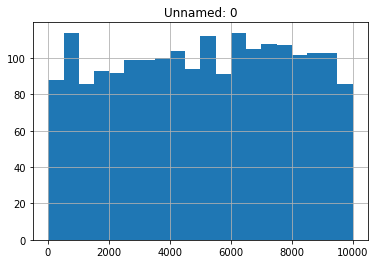

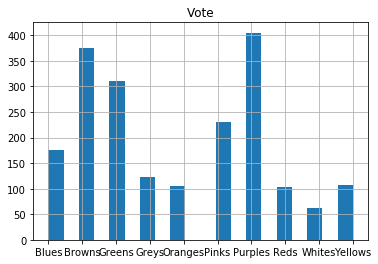

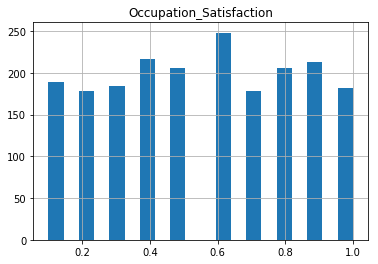

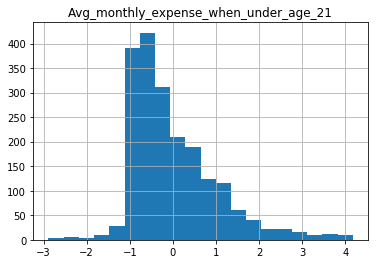

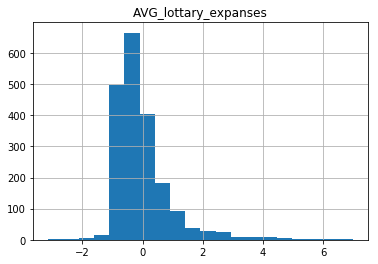

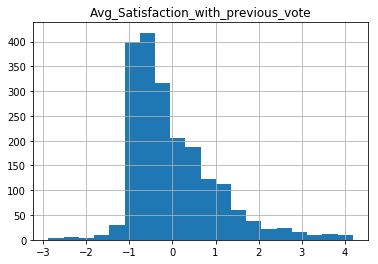

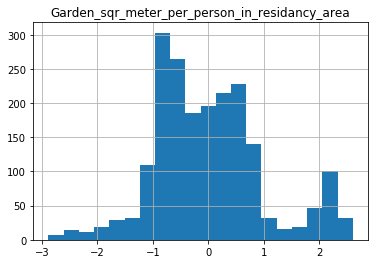

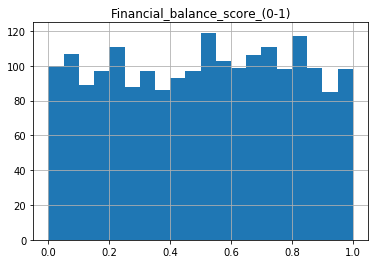

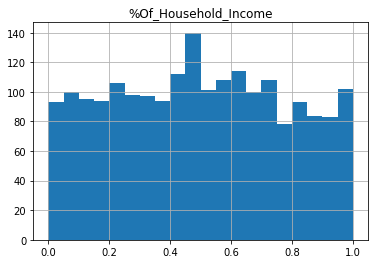

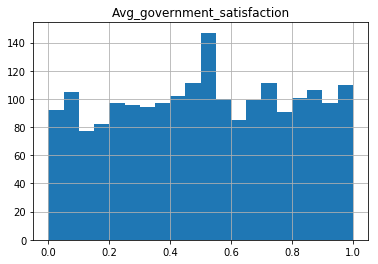

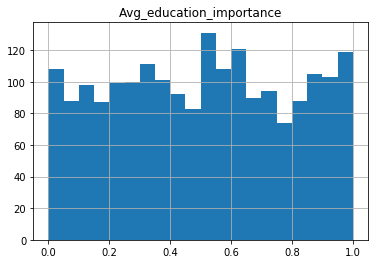

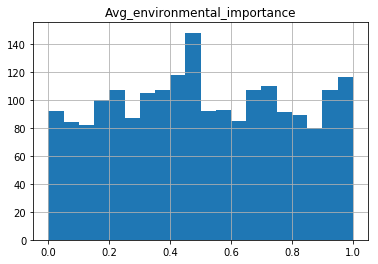

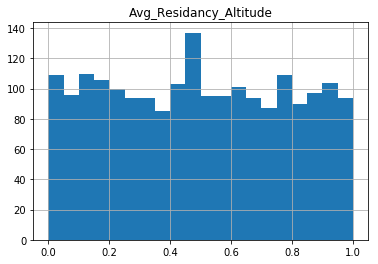

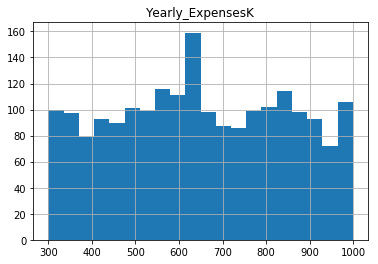

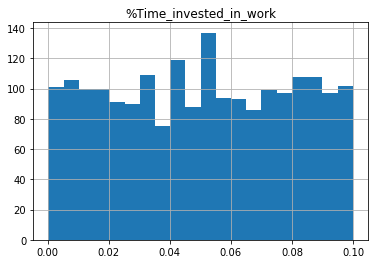

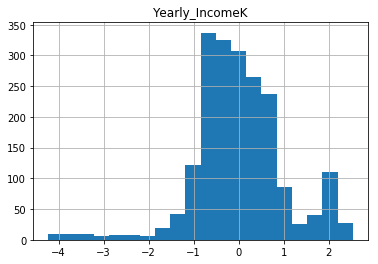

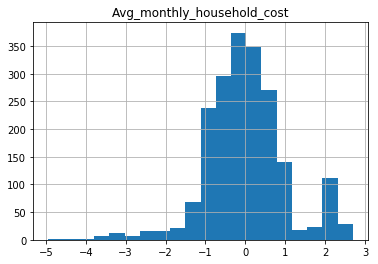

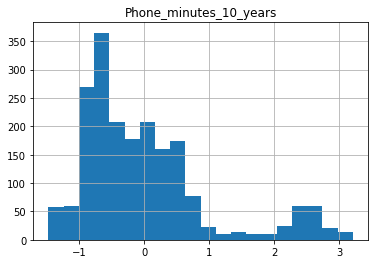

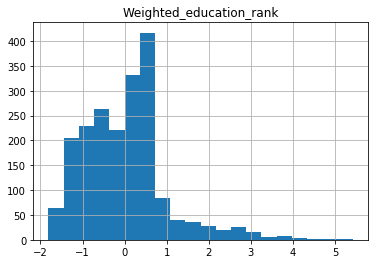

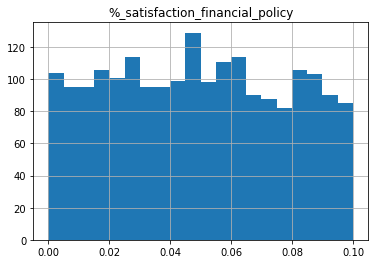

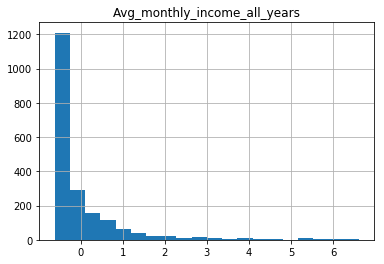

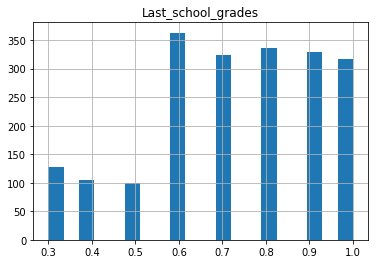

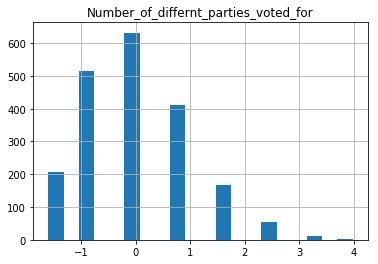

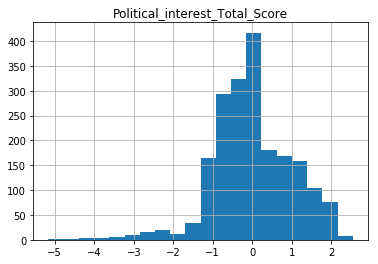

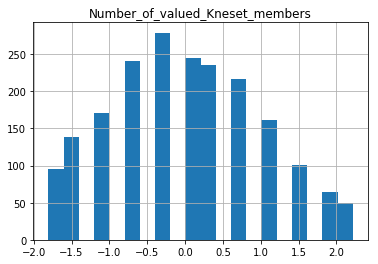

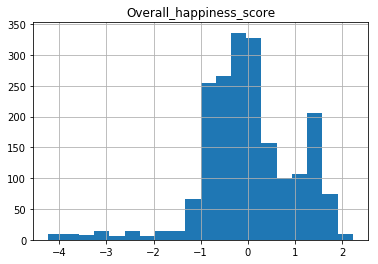

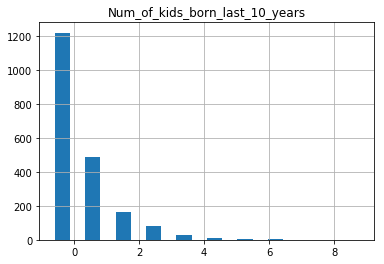

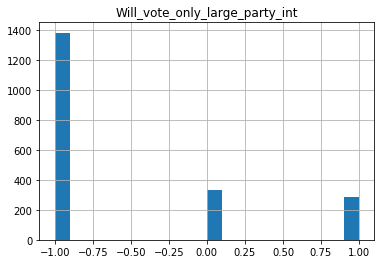

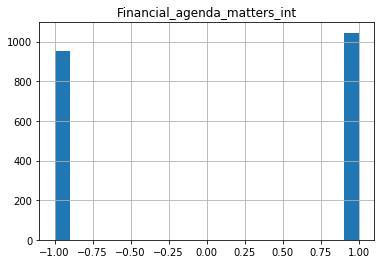

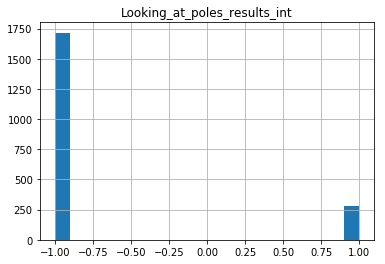

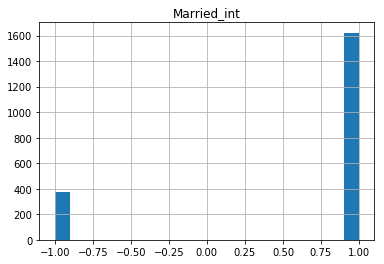

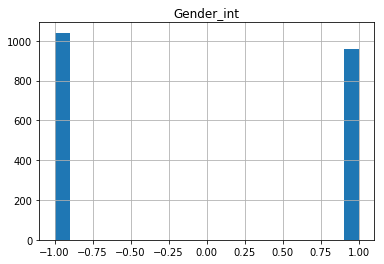

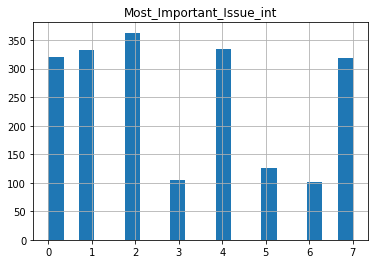

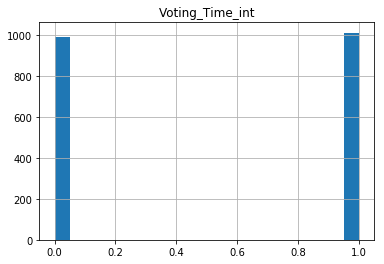

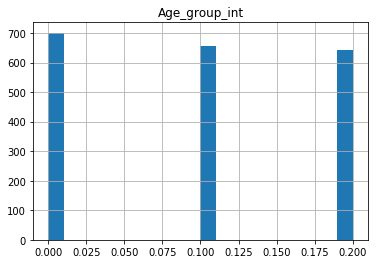

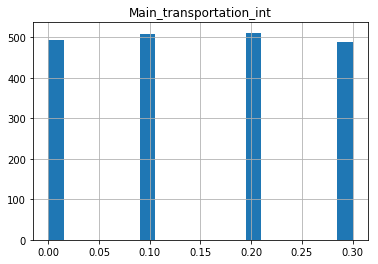

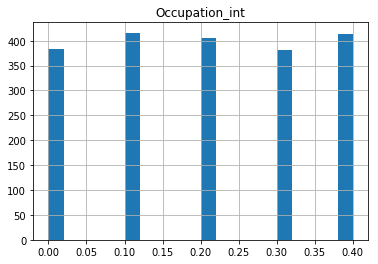

In [52]:
for feature in alldata.columns:
    plt.figure()
    alldata[feature].hist(bins=20)
    plt.title(feature)

P.show()


Bonus question - #2 - Hybrid feature secltion using variance, mutual informtion and backward elimination

In [53]:
from sklearn.feature_selection import SelectPercentile, f_classif, mutual_info_classif

data_without_votes = alldata.drop(['Vote'], axis=1)
data_X = data_without_votes.values
data_Y = alldata.Vote.values

print "Find features by variance and mutual information"

selector = SelectPercentile(f_classif, percentile=60)
selector.fit(data_X, data_Y)
support = selector.get_support()
f_classif_selected = []
f_classif_full = []

for idx, col in enumerate(data_without_votes.columns):
    if support[idx]:
        f_classif_selected.append(col)
    f_classif_full.append((col,selector.scores_[idx]))

# print "column scores:"
# print f_classif_full
# print "selected:"
# print f_classif_selected

selector = SelectPercentile(mutual_info_classif, percentile=60)
selector.fit(data_X, data_Y)
support = selector.get_support()

mutual_info_classif_selected = []
mutual_info_classif_full = []

for idx, col in enumerate(data_without_votes.columns):
    if support[idx]:
        mutual_info_classif_selected.append(col)
    mutual_info_classif_full.append((col,selector.scores_[idx]))

Find features by variance and mutual information


In [28]:
f_classif_selected

['Occupation_Satisfaction',
 'Avg_monthly_expense_when_under_age_21',
 'AVG_lottary_expanses',
 'Avg_Satisfaction_with_previous_vote',
 'Garden_sqr_meter_per_person_in_residancy_area',
 'Avg_Residancy_Altitude',
 'Yearly_ExpensesK',
 'Yearly_IncomeK',
 'Avg_monthly_household_cost',
 'Phone_minutes_10_years',
 'Weighted_education_rank',
 'Avg_monthly_income_all_years',
 'Last_school_grades',
 'Political_interest_Total_Score',
 'Number_of_valued_Kneset_members',
 'Overall_happiness_score',
 'Will_vote_only_large_party_int',
 'Looking_at_poles_results_int',
 'Married_int',
 'Gender_int',
 'Most_Important_Issue_int']

In [54]:
mutual_info_classif_selected

['Avg_monthly_expense_when_under_age_21',
 'AVG_lottary_expanses',
 'Avg_Satisfaction_with_previous_vote',
 'Garden_sqr_meter_per_person_in_residancy_area',
 'Yearly_IncomeK',
 'Avg_monthly_household_cost',
 'Phone_minutes_10_years',
 'Weighted_education_rank',
 '%_satisfaction_financial_policy',
 'Avg_monthly_income_all_years',
 'Last_school_grades',
 'Political_interest_Total_Score',
 'Number_of_valued_Kneset_members',
 'Overall_happiness_score',
 'Will_vote_only_large_party_int',
 'Financial_agenda_matters_int',
 'Looking_at_poles_results_int',
 'Married_int',
 'Gender_int',
 'Most_Important_Issue_int',
 'Occupation_int']

In [55]:
(set(mutual_info_classif_selected)|set(f_classif_selected))

{'%Of_Household_Income',
 '%_satisfaction_financial_policy',
 'AVG_lottary_expanses',
 'Avg_Satisfaction_with_previous_vote',
 'Avg_monthly_expense_when_under_age_21',
 'Avg_monthly_household_cost',
 'Avg_monthly_income_all_years',
 'Financial_agenda_matters_int',
 'Garden_sqr_meter_per_person_in_residancy_area',
 'Gender_int',
 'Last_school_grades',
 'Looking_at_poles_results_int',
 'Married_int',
 'Most_Important_Issue_int',
 'Number_of_valued_Kneset_members',
 'Occupation_int',
 'Overall_happiness_score',
 'Phone_minutes_10_years',
 'Political_interest_Total_Score',
 'Unnamed: 0',
 'Voting_Time_int',
 'Weighted_education_rank',
 'Will_vote_only_large_party_int',
 'Yearly_IncomeK'}

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
svc = SVC(kernel="linear", C=1)
rfecv = RFECV(estimator=svc, step=1, cv=3, scoring='accuracy')
rfecv.fit(data_X, data_Y)
support = rfecv.get_support()
# print support
rfecv_selected = []
rfecv_full = []

for idx, col in enumerate(data_without_votes.columns):
    if support[idx]:
        rfecv_selected.append(col)
    rfecv_full.append((col,selector.scores_[idx]))

In [ ]:
rfecv_selected

['Occupation_Satisfaction', 'Avg_monthly_expense_when_under_age_21', 'Garden_sqr_meter_per_person_in_residancy_area', 'Yearly_IncomeK', 'Avg_monthly_household_cost', 'Phone_minutes_10_years', 'Weighted_education_rank', 'Avg_monthly_income_all_years', 'Last_school_grades', 'Political_interest_Total_Score'] - the results of blackwards elimnation as executed locally